### Bike sharing demand prediction for the hourly date

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
# Read the data
bikes = pd.read_csv("hour.csv")
bikes.head(2)

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [6]:
# Prelim Analysis and Feature selection 
bikes_prep = bikes.copy()

In [12]:
bikes_prep = bikes_prep.drop(["index", "date", "casual", "registered"], axis=1)

In [13]:
bikes_prep.head(2)

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40


In [15]:
# Check the null or missing values
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

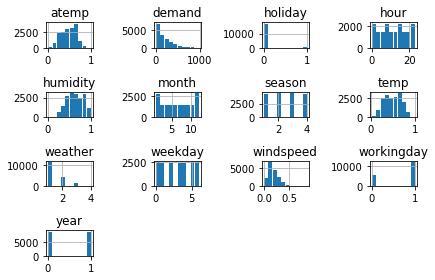

In [18]:
# Simple visualization of the data using Pandas histogram
bikes_prep.hist(rwidth = 0.9)
plt.tight_layout();
## Demand is not normally distributed

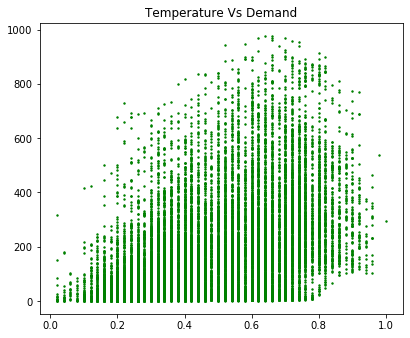

In [43]:
# Step 3 - Visualizing data in different forms (features Vs demand)
plt.figure(figsize=(11, 9))
plt.subplot(2,2,1)
plt.title("Temperature Vs Demand")
plt.scatter(bikes_prep["temp"], bikes_prep["demand"], s=2, c="g")
plt.tight_layout()

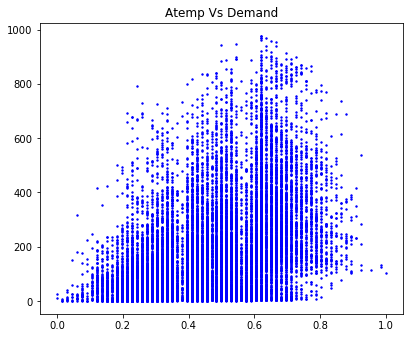

In [44]:
plt.figure(figsize=(11, 9))
plt.subplot(2,2,2)
plt.title("Atemp Vs Demand")
plt.scatter(bikes_prep["atemp"], bikes_prep["demand"], s=2, c="b")
plt.tight_layout()

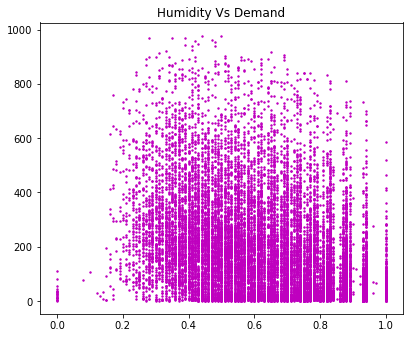

In [45]:
plt.figure(figsize=(11, 9))
plt.subplot(2,2,3)
plt.title("Humidity Vs Demand")
plt.scatter(bikes_prep["humidity"], bikes_prep["demand"], s=2, c="m")
plt.tight_layout()

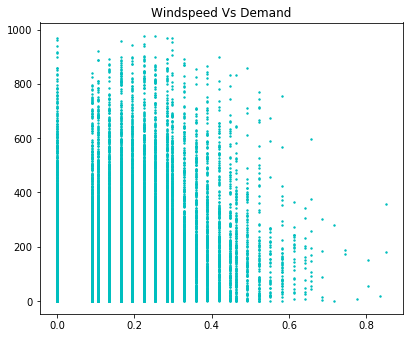

In [46]:
plt.figure(figsize=(11, 9))
plt.subplot(2,2,4)
plt.title("Windspeed Vs Demand")
plt.scatter(bikes_prep["windspeed"], bikes_prep["demand"], s=2, c="c")
plt.tight_layout()

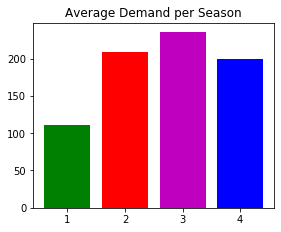

In [66]:
# Visualizing the categorical features
colors = ["g", "r", "m", "b"]

plt.figure(figsize=(11, 9))
plt.subplot(3,3,1)
plt.title("Average Demand per Season")
cat_list = bikes_prep["season"].unique()
cat_average = bikes_prep.groupby("season").mean()["demand"]
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()

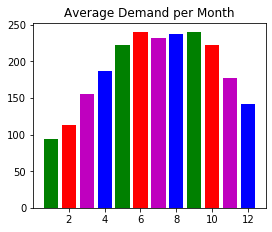

In [68]:
plt.figure(figsize=(11, 9))
plt.subplot(3,3,2)
plt.title("Average Demand per Month")
cat_list = bikes_prep["month"].unique()
cat_average = bikes_prep.groupby("month").mean()["demand"]
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()

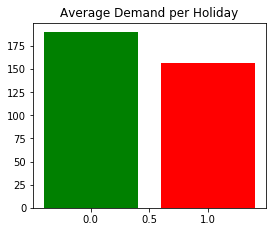

In [69]:
plt.figure(figsize=(11, 9))
plt.subplot(3,3,3)
plt.title("Average Demand per Holiday")
cat_list = bikes_prep["holiday"].unique()
cat_average = bikes_prep.groupby("holiday").mean()["demand"]
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()

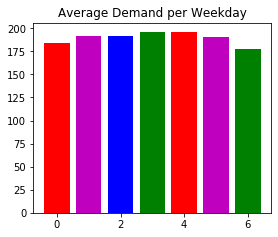

In [70]:
plt.figure(figsize=(11, 9))
plt.subplot(3,3,4)
plt.title("Average Demand per Weekday")
cat_list = bikes_prep["weekday"].unique()
cat_average = bikes_prep.groupby("weekday").mean()["demand"]
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()

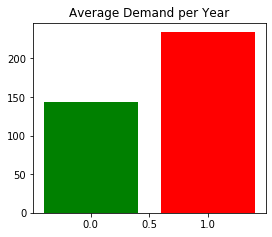

In [71]:
plt.figure(figsize=(11, 9))
plt.subplot(3,3,5)
plt.title("Average Demand per Year")
cat_list = bikes_prep["year"].unique()
cat_average = bikes_prep.groupby("year").mean()["demand"]
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()

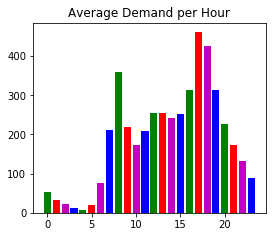

In [72]:
plt.figure(figsize=(11, 9))
plt.subplot(3,3,6)
plt.title("Average Demand per Hour")
cat_list = bikes_prep["hour"].unique()
cat_average = bikes_prep.groupby("hour").mean()["demand"]
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()

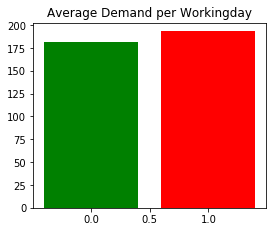

In [74]:
plt.figure(figsize=(11, 9))
plt.subplot(3,3,7)
plt.title("Average Demand per Workingday")
cat_list = bikes_prep["workingday"].unique()
cat_average = bikes_prep.groupby("workingday").mean()["demand"]
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()

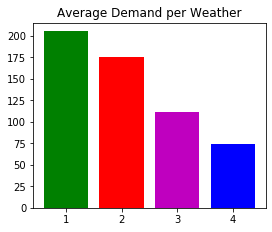

In [75]:
plt.figure(figsize=(11, 9))
plt.subplot(3,3,8)
plt.title("Average Demand per Weather")
cat_list = bikes_prep["weather"].unique()
cat_average = bikes_prep.groupby("weather").mean()["demand"]
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()

In [76]:
# Features to be dropped: "weekday", "workingday" and "year"

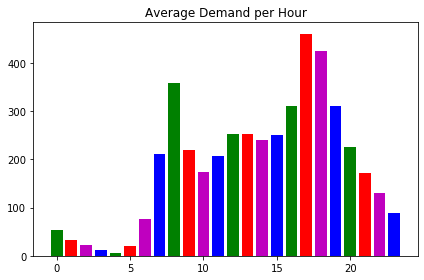

In [77]:
plt.title("Average Demand per Hour")
cat_list = bikes_prep["hour"].unique()
cat_average = bikes_prep.groupby("hour").mean()["demand"]
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()

In [78]:
# Check the outliers
bikes_prep["demand"].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [80]:
bikes_prep["demand"].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [81]:
# Linearity using correlation coefficient matrix using corr
correlation = bikes_prep[["temp", "atemp", "humidity", "windspeed", "demand"]].corr()
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [86]:
# Updating: all features to be dropped: "weekday", "workingday" , "year", "windspeed" and "atemp"
# Drop
bikes_prep = bikes_prep.drop(["weekday", "workingday" , "year", "windspeed", "atemp" ], axis=1)

In [87]:
bikes_prep.head(2)

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40


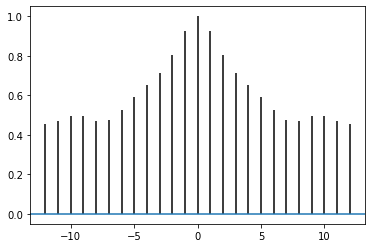

In [89]:
# Check the autocorrelation in demand using the acorr plot
df1 = pd.to_numeric(bikes_prep["demand"], downcast="float")
plt.acorr(df1, maxlags=12);

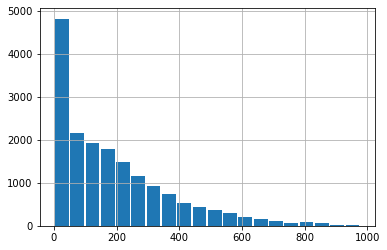

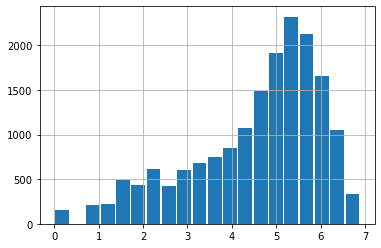

In [92]:
# Log-normalizing the feature "demand"
df1 = bikes_prep["demand"]
df2 = np.log(df1)

plt.figure()
df1.hist(rwidth=0.9, bins=20)

plt.figure()
df2.hist(rwidth=0.9, bins=20);

In [93]:
bikes_prep["demand"] = np.log(bikes_prep["demand"])

In [94]:
bikes_prep.head(2)

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,2.772589
1,1,1,1,0,1,0.22,0.80,3.688879


In [101]:
# Dealing with autocorrelation in the demand column
t_1 = bikes_prep["demand"].shift(+1).to_frame()
t_1.columns = ["t-1"]

t_2 = bikes_prep["demand"].shift(+2).to_frame()
t_2.columns = ["t-2"]

t_3 = bikes_prep["demand"].shift(+3).to_frame()
t_3.columns = ["t-3"]

bikes_prep_lag = pd.concat([bikes_prep, t_1, t_2, t_3], axis=1)

In [102]:
bikes_prep_lag.head(5)

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879


In [103]:
bikes_prep_lag = bikes_prep_lag.dropna()
bikes_prep_lag.head(3)

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736


In [111]:
# Create Dummy Variables for the categorical features
bikes_prep_lag.dtypes
bikes_prep_lag["season"] = bikes_prep_lag["season"].astype("category")
bikes_prep_lag["holiday"] = bikes_prep_lag["holiday"].astype("category")
bikes_prep_lag["weather"] = bikes_prep_lag["weather"].astype("category")
bikes_prep_lag["month"] = bikes_prep_lag["month"].astype("category")
bikes_prep_lag["hour"] = bikes_prep_lag["hour"].astype("category")
bikes_prep_lag.dtypes

dummy_df = pd.get_dummies(bikes_prep_lag, drop_first=True)

dummy_df

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [135]:
# Now let's split the dataset (X, Y) into training and test set

X = bikes_prep_lag.drop(["demand"], axis=1)
Y = bikes_prep_lag[["demand"]]

tr_size = 0.7 * len(X)
tr_size = int(tr_size)

#Create train and test datasets
X_train = X.values[0 : tr_size]
X_test = X.values[tr_size : len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]

#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1234)

In [136]:
from sklearn.linear_model import LinearRegression
std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

r2_train = std_reg.score(X_train, Y_train)
r2_test = std_reg.score(X_test, Y_test)

# Create Y Predictions
Y_predict = std_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))

In [137]:
r2_train

0.8620985028863707

In [138]:
r2_test

0.8886718544254077

In [139]:
Y_predict

array([[3.77892932],
       [3.37032491],
       [2.26903141],
       ...,
       [4.37274204],
       [4.50436858],
       [4.14107823]])

In [140]:
rmse

0.4761185775605758

In [141]:
# Calculate the RMSLE
Y_test_e = []
Y_predict_e = []
for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))

In [142]:
# Calculate the sum
log_sq_sum = 0.0
for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(Y_test))

In [143]:
rmsle

0.4521400264170536